In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import joblib

# Configuração do estilo dos gráficos
sns.set_style('whitegrid')

# CARREGAMENTO DO DATASET

In [9]:
df = pd.read_csv('dataset_treinamento_carelink.csv')

# ANÁLISE EXPLORATÓRIA DE DADOS (AED)

In [10]:
# Visualização das primeiras entradas do dataset
print("Visualização das primeiras 5 entradas do dataset:")
display(df.head())

Visualização das primeiras 5 entradas do dataset:


,idade_paciente,bairro_paciente,afinidade_digital_score,tem_cuidador,especialidade_consulta,faltas_consecutivas_historico,taxa_absenteismo_historica,tempo_desde_ultima_consulta_dias,tempo_desde_primeira_consulta_dias,TARGET_FALTA_BINARIA
0,72,Mooca,39,0,Tecnologias Assistivas,1,0.217130,13,113,1
1,62,Grajaú,40,0,Condicionamento Físico,0,0.067315,19,67,0
2,74,Lajeado,25,0,Psicologia,0,0.345647,17,51,1
3,87,Grajaú,26,1,Fonoaudiologia,0,0.301744,19,83,1
4,61,Pinheiros,79,0,Fonoaudiologia,0,0.277763,12,86,0


In [11]:
# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   idade_paciente                      2000 non-null   int64  
 1   bairro_paciente                     2000 non-null   object 
 2   afinidade_digital_score             2000 non-null   int64  
 3   tem_cuidador                        2000 non-null   int64  
 4   especialidade_consulta              2000 non-null   object 
 5   faltas_consecutivas_historico       2000 non-null   int64  
 6   taxa_absenteismo_historica          2000 non-null   float64
 7   tempo_desde_ultima_consulta_dias    2000 non-null   int64  
 8   tempo_desde_primeira_consulta_dias  2000 non-null   int64  
 9   TARGET_FALTA_BINARIA                2000 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 156.4+ KB


In [12]:
# Estatísticas descritivas do dataset
print("\nEstatísticas descritivas do dataset:")
display(df.describe())


Estatísticas descritivas do dataset:


,idade_paciente,afinidade_digital_score,tem_cuidador,faltas_consecutivas_historico,taxa_absenteismo_historica,tempo_desde_ultima_consulta_dias,tempo_desde_primeira_consulta_dias,TARGET_FALTA_BINARIA
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,65.125500,49.825500,0.348000,0.486000,1.550506e-01,15.868500,71.778000,0.301000
std,14.694139,24.164458,0.476455,0.678258,1.342955e-01,4.881303,18.494181,0.458807
min,18.000000,0.000000,0.000000,0.000000,5.097974e-07,7.000000,31.000000,0.000000
25%,55.000000,33.750000,0.000000,0.000000,4.725075e-02,12.000000,58.000000,0.000000
50%,65.000000,50.000000,0.000000,0.000000,1.177754e-01,15.000000,70.000000,0.000000
75%,75.000000,67.000000,1.000000,1.000000,2.346944e-01,19.000000,85.000000,1.000000
max,100.000000,100.000000,1.000000,3.000000,7.637190e-01,29.000000,119.000000,1.000000


In [13]:
# Verificação de valores nulos
print("\nVerificação de valores nulos:")
print(df.isnull().sum())


Verificação de valores nulos:
idade_paciente                        0
bairro_paciente                       0
afinidade_digital_score               0
tem_cuidador                          0
especialidade_consulta                0
faltas_consecutivas_historico         0
taxa_absenteismo_historica            0
tempo_desde_ultima_consulta_dias      0
tempo_desde_primeira_consulta_dias    0
TARGET_FALTA_BINARIA                  0
dtype: int64


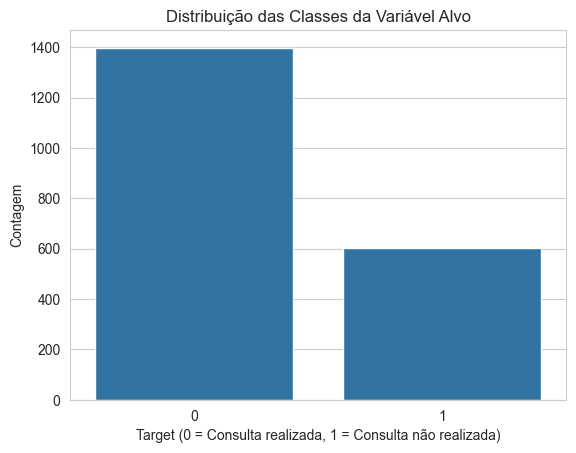

In [14]:
# Distribuição da variável alvo
import matplotlib.pyplot as plt

sns.countplot(x='TARGET_FALTA_BINARIA', data=df)
plt.title('Distribuição das Classes da Variável Alvo')
plt.xlabel('Target (0 = Consulta realizada, 1 = Consulta não realizada)')
plt.ylabel('Contagem')
plt.show()

In [15]:
# Observação sobre o balanceamento das classes
print("\nContagem de classes:")
print(df['TARGET_FALTA_BINARIA'].value_counts())


Contagem de classes:
TARGET_FALTA_BINARIA
0    1398
1     602
Name: count, dtype: int64


# PREPARAÇÃO DOS DADOS PARA O MODELO

In [16]:
# Separação das Variáveis Independentes (X) e Dependente (y)
y = df['TARGET_FALTA_BINARIA']
X = df.drop('TARGET_FALTA_BINARIA', axis=1)

# Divisão dos Dados em Conjuntos de Treino e Teste
# Usando stratify=y para manter a proporção das classes nos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificação das dimensões dos conjuntos
print(f"\nDimensão do conjunto de treino: {X_train.shape}")
print(f"Dimensão do conjunto de teste: {X_test.shape}")
print(f"Distribuição do target: {y.mean():.3f}")


Dimensão do conjunto de treino: (1600, 9)
Dimensão do conjunto de teste: (400, 9)
Distribuição do target: 0.301


# NORMALIZAÇÃO DOS DADOS

In [17]:
colunas_categoricas = ['bairro_paciente', 'especialidade_consulta']
colunas_numericas = X.columns.difference(colunas_categoricas).tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), colunas_categoricas)
    ]
)

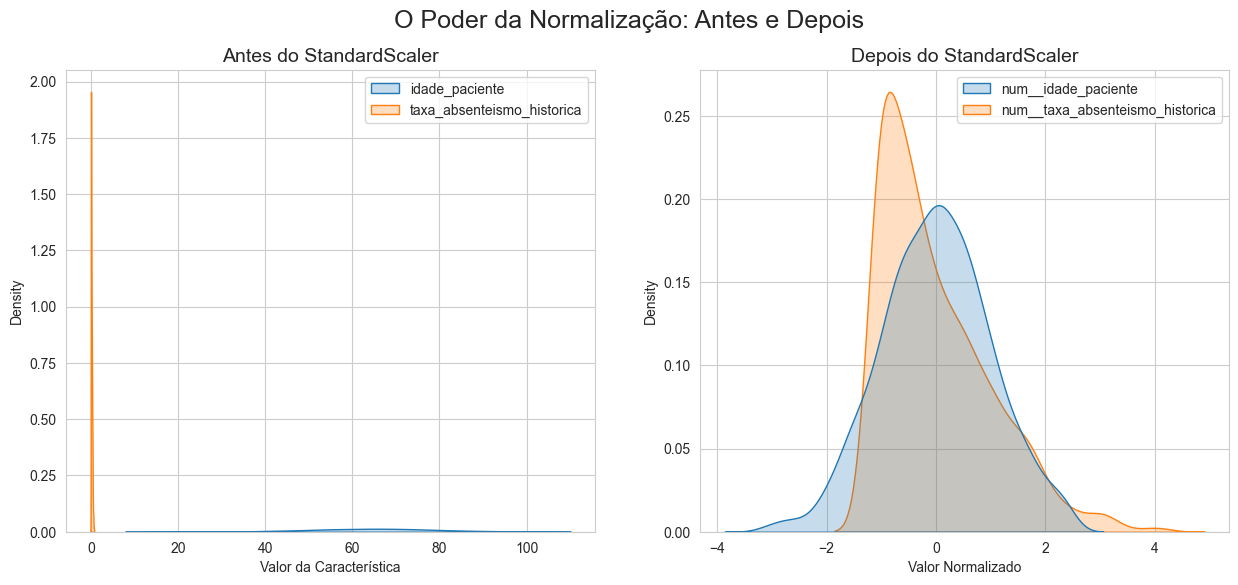

In [18]:
# Aplicar o pré-processador nos dados de treino
X_train_processed = preprocessor.fit_transform(X_train)

# Converter para array denso se for esparso
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()

# Obter os nomes das features após o pré-processamento
feature_names = preprocessor.get_feature_names_out()

# Criar DataFrame com os dados processados
df_processed_train = pd.DataFrame(X_train_processed, columns=feature_names)

# Escolhendo algumas features NUMÉRICAS (usando os novos nomes)
# As numéricas mantêm os nomes originais, as categóricas têm prefixo
features_to_plot = ['num__idade_paciente', 'num__taxa_absenteismo_historica']

# Configurando a figura
plt.figure(figsize=(15, 6))
plt.suptitle('O Poder da Normalização: Antes e Depois', fontsize=18)

# Gráfico ANTES
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train[['idade_paciente', 'taxa_absenteismo_historica']], fill=True)
plt.title('Antes do StandardScaler', fontsize=14)
plt.xlabel('Valor da Característica')

# Gráfico DEPOIS
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_processed_train[features_to_plot], fill=True)
plt.title('Depois do StandardScaler', fontsize=14)
plt.xlabel('Valor Normalizado')

plt.show()

# TREINAMENTO DO MODELO DE REGRESSÃO LOGÍSTICA

In [19]:
# Criando uma instância do modelo de Regressão Logística com parâmetros específicos
modelo_logistico = LogisticRegression(
    solver='liblinear',        # Algoritmo de otimização para problemas pequenos/médios
    random_state=42,           # Semente para reproducibilidade dos resultados
    class_weight='balanced',   # Ajusta pesos automaticamente para lidar com classes desbalanceadas
    C=0.1,                     # Parâmetro de regularização (inverso da força) - C menor = mais regularização
    max_iter=2000              # Número máximo de iterações para convergência do algoritmo
)

# Criando um pipeline que encadeia todas as etapas do processo
pipeline_completo = Pipeline(steps=[
    ('preprocessor', preprocessor),    # Primeiro passo: pré-processamento dos dados (scaling + encoding)
    ('model', modelo_logistico)        # Segundo passo: modelo de machine learning
])

# Treinando o pipeline completo (pré-processamento + modelo) nos dados de treino
pipeline_completo.fit(X_train, y_train)
# O pipeline automaticamente:
# 1. Aplica o pré-processador nos dados X_train
# 2. Treina o modelo logistico com os dados pré-processados
# 3. Mantém todo o processo encapsulado para evitar data leakage (ou seja, vazamento de dados)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# AVALIAÇÃO DO MODELO


Relatório de Classificação (Modelo Padrão):
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       280
           1       0.50      0.68      0.58       120

    accuracy                           0.70       400
   macro avg       0.67      0.70      0.67       400
weighted avg       0.74      0.70      0.71       400



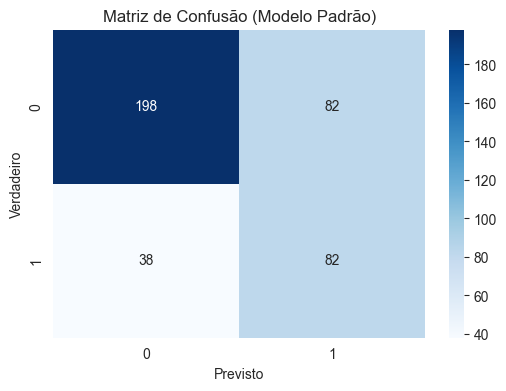

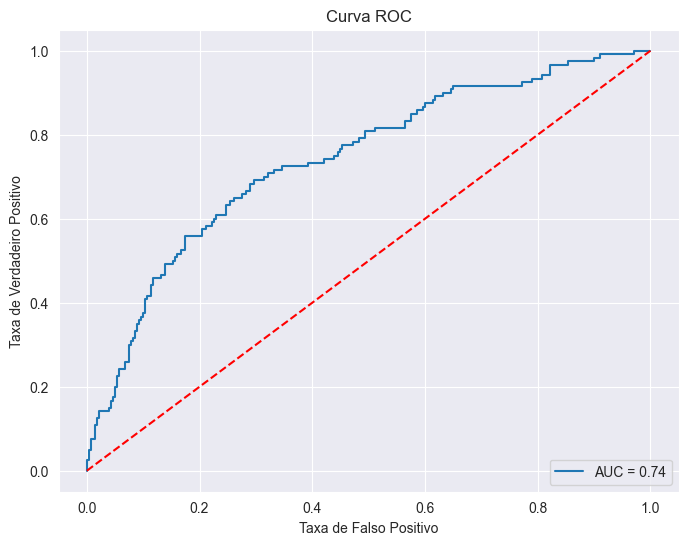

In [20]:
# Previsões nos dados de teste
y_pred = pipeline_completo.predict(X_test)
y_pred_proba = pipeline_completo.predict_proba(X_test)[:,1]

# Relatório de classificação do modelo
print("\nRelatório de Classificação (Modelo Padrão):")
print(classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Modelo Padrão)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# SALVANDO O MODELO PARA DEPLOY

In [21]:
# Salvando o modelo
joblib.dump(pipeline_completo, 'model_carelink.joblib')
print("Modelo treinado e salvo como: model_carelink.joblib")

# Avaliação
y_pred_proba = pipeline_completo.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

print(f"\n--- DESEMPENHO DO MODELO ---")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Taxa de absenteísmo real: {y_test.mean():.3f}")

Modelo treinado e salvo como: model_carelink.joblib

--- DESEMPENHO DO MODELO ---
AUC-ROC: 0.7408
Acurácia: 0.7000
Taxa de absenteísmo real: 0.300


# TESTE COM DIFERENTES CENÁRIOS

In [22]:
print("\n--- PREVISÃO PARA TODOS OS CENÁRIOS ---")
cenarios = [
    [45, 'Moema', 1, 85, 'Nutrição', 0, 0.05, 200, 10],
    [68, 'Tatuapé', 1, 45, 'Fisioterapia', 1, 0.15, 80, 12],
    [78, 'Grajaú', 0, 20, 'Psicologia', 2, 0.25, 50, 25],
    [75, 'Cidade Tiradentes', 0, 15, 'Terapia Ocupacional', 3, 0.35, 40, 30],
    [62, 'Santana', 0, 70, 'Fonoaudiologia', 0, 0.08, 30, 8],
    [65, 'Vila Mariana', 1, 60, 'Fonoaudiologia', 0, 0.10, 70, 10],
    [80, 'Brasilândia', 1, 25, 'Neurologia', 1, 0.20, 60, 20]
]

nomes_colunas = ['idade_paciente', 'bairro_paciente', 'tem_cuidador', 'afinidade_digital_score',
                 'especialidade_consulta', 'faltas_consecutivas_historico', 'taxa_absenteismo_historica',
                 'tempo_desde_primeira_consulta_dias', 'tempo_desde_ultima_consulta_dias']

for i, cenario in enumerate(cenarios, 1):
    cenario_df = pd.DataFrame([cenario], columns=nomes_colunas)
    prob = pipeline_completo.predict_proba(cenario_df)[0, 1]
    score = int(round(prob * 1000))

    if score <= 200:
        nivel = "BAIXO"
    elif score <= 500:
        nivel = "MÉDIO"
    elif score <= 800:
        nivel = "ALTO"
    else:
        nivel = "CRÍTICO"

    print(f"Cenário {i}: Prob = {prob:.3f}, Score = {score}, Nível = {nivel}")


--- PREVISÃO PARA TODOS OS CENÁRIOS ---
Cenário 1: Prob = 0.166, Score = 166, Nível = BAIXO
Cenário 2: Prob = 0.458, Score = 458, Nível = MÉDIO
Cenário 3: Prob = 0.786, Score = 786, Nível = ALTO
Cenário 4: Prob = 0.849, Score = 849, Nível = CRÍTICO
Cenário 5: Prob = 0.389, Score = 389, Nível = MÉDIO
Cenário 6: Prob = 0.378, Score = 378, Nível = MÉDIO
Cenário 7: Prob = 0.677, Score = 677, Nível = ALTO
